# Assignment A6-1 Spam or No-Spam

_Subject_, **Artificial Intelligence**  
_Topic_, **Machine Learning**  
_Subtopic_, **Predictive Analytics with Naïve Bayes**  

### Resources
* [CPHBusiness | GitHub Pages](https://datsoftlyngby.github.io/soft2020spring/resources/35dc6d31-ML2006-1.pdf)
* [CPHBusiness | presentaion 1](https://datsoftlyngby.github.io/soft2020spring/resources/35dc6d31-ML2006-1.pdf)
* [CPHBusiness | presentaion 2](https://datsoftlyngby.github.io/soft2020spring/resources/999b0463-ML2006-2.pdf)
* [Scikit-learn | Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

### Content
_Only works in jupyter notebooks_
* [Naïve Bayes](#)
* [Prepare Environment](#)
* [Analyse Data](#)
* [Preprocess Data](#)
* [Create Model](#)
* [Evaluate Model](#)
* [Analyse Model](#)
* [Validate Model](#)

### Assignment
Train a machine learning model to be able to recognise spam in text messages.  
Use the attached data file and the class exercise E6-2 for inspiration.

## Naïve Bayes

## Prepare Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data preprocessing
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer

# modelling
from sklearn.naive_bayes import MultinomialNB

# validation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Analyse Data

In [2]:
# load dataset
file_path = './data-assets/spam_source.csv'
dataset = pd.read_csv(file_path)

# display dataset shape
dataset.shape

(5559, 2)

In [3]:
# display dataset head
dataset.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
# display distribution of classifiers
dataset.type.value_counts()

ham     4812
spam     747
Name: type, dtype: int64

In [5]:
# display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


## Preprocess Data

In [6]:
# seperate features and labels from the dataset
labels = dataset['type']
features = dataset['text']

# splitting the dataset into train and test sets
X_train, X_test, y_train, y_test  = model_selection.train_test_split(features, labels, test_size=0.2, random_state=7)

# 
tfidf = TfidfVectorizer(encoding='utf-8', lowercase=True, stop_words='english', max_df=0.5, sublinear_tf=True, use_idf=True)

#
word_vect = tfidf.fit_transform(X_train)

# 
word_vect.shape

(4447, 7457)

In [7]:
# 
word_vect.shape

(4447, 7457)

In [8]:
# 
print(word_vect[0:5, ])

(0, 453)	0.2626577944575732
  (0, 4106)	0.2626577944575732
  (0, 258)	0.1908779458329685
  (0, 5913)	0.2626577944575732
  (0, 4436)	0.2626577944575732
  (0, 533)	0.17301654601823138
  (0, 319)	0.17768766451177123
  (0, 693)	0.2535556983579993
  (0, 2266)	0.19557386983745165
  (0, 6835)	0.1410665208179753
  (0, 1764)	0.1561184818788633
  (0, 260)	0.18232611451754807
  (0, 2530)	0.2626577944575732
  (0, 801)	0.2626577944575732
  (0, 6767)	0.2626577944575732
  (0, 2565)	0.2626577944575732
  (0, 6783)	0.2077760099723366
  (0, 1877)	0.22154922456545034
  (0, 1138)	0.1849280808716544
  (0, 6935)	0.12209485173111802
  (0, 6939)	0.1694974305902824
  (1, 7167)	0.34280452667746797
  (1, 1184)	0.32789251523592317
  (1, 5078)	0.3022998931176685
  (1, 3891)	0.3697806661643059
  :	:
  (2, 638)	0.21306589619424862
  (2, 3738)	0.11843905538404081
  (2, 4393)	0.1994568750319333
  (2, 6708)	0.31507693040670604
  (2, 4648)	0.30274084736952916
  (2, 4641)	0.2330796248982459
  (2, 7171)	0.26661489139560585

In [10]:
# get the vector for the first document
first_vector = word_vect[0]
 
# place tf-idf values in a pandas data frame to see it in more readable format
df = pd.DataFrame(first_vector.T.todense(), index=tfidf.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
eurodisinc,0.262658
morefrmmob,0.262658
entry41,0.262658
aco,0.262658
ls1,0.262658
...,...
embarassing,0.000000
embarassed,0.000000
emailed,0.000000
email,0.000000


## Create Model

In [9]:
# we choose multinomial naive bayes
classifier = MultinomialNB()

# connect the vectorizer to the multinomial classifier
model = make_pipeline(tfidf, classifier)

# train a model
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.5, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## Evaluate Model

In [11]:
# use the trained model to predict categories for the test data
y_predicted = model.predict(X_test)

# diplay model score
model.score(X_test, y_test)

0.9703237410071942

## Validate Model

In [19]:
# 
accuracy_score(y_test, y_predicted)

0.9703237410071942

In [20]:
#
cmat = confusion_matrix(y_test, y_predicted)

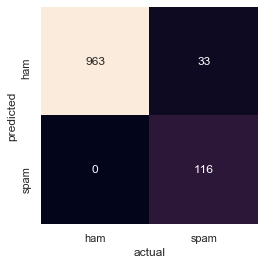

In [21]:
#
targets = dataset.type.unique()

#
sns.set()
sns.heatmap(cmat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=targets, yticklabels=targets)

plt.xlabel('actual')
plt.ylabel('predicted');
plt.show()

In [22]:
print(classification_report(y_test, y_predicted))

precision    recall  f1-score   support

         ham       0.97      1.00      0.98       963
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1112
   macro avg       0.98      0.89      0.93      1112
weighted avg       0.97      0.97      0.97      1112



In [23]:
#
test_case_ham = dataset.query('type == "ham"').head(1).loc[:, 'text']
test_case_spam = dataset.query('type == "spam"').head(1).loc[:, 'text']

#
test_case_ham_unknown = pd.Series(['Hello world - take care and keep distance'])
test_case_spam_unknown = pd.Series(['You just won the huge jackpot of 1.000.000$ - click here to collect it!'])

#
print('ham', test_case_ham, '\n')
print('spam', test_case_spam)

ham 0    Hope you are having a good week. Just checking in
Name: text, dtype: object 

spam 3    complimentary 4 STAR Ibiza Holiday or £10,000 ...
Name: text, dtype: object


In [24]:
#
print('predict known ham::', model.predict(test_case_ham))
print('predict known spam::', model.predict(test_case_spam))

predict known ham:: ['ham']
predict known spam:: ['spam']


In [25]:
#
print('predict unknown ham::', model.predict(test_case_ham_unknown))
print('predict unknown spam::', model.predict(test_case_spam_unknown))

predict unknown ham:: ['ham']
predict unknown spam:: ['spam']
